In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [92]:
df=pd.read_excel('carclaimtxt.xlsx')

In [93]:
df.shape

(15420, 33)

In [94]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Encoding the Categorical variables

In [95]:
le=LabelEncoder()
Past_Claims={'PastNumberOfClaims':{'2 to 4':2,'none':0,'1':1,'more than 4':3}}
df['NumberOfCars']=le.fit_transform(df['NumberOfCars'])
df['AgeOfVehicle']=le.fit_transform(df['AgeOfVehicle'])
df['PastNumberOfClaims'].value_counts()
df['Month']=le.fit_transform(df['Month'])
monthclaimed={'MonthClaimed':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}}
df.replace(monthclaimed,inplace=True)
Past_Claims={'PastNumberOfClaims':{'2 to 4':2,'none':0,'1':1,'more than 4':3}}
df.replace(Past_Claims,inplace=True)
df['Sex']=le.fit_transform(df['Sex'])
df['Fault']=le.fit_transform(df['Fault'])
df['PolicyType']=le.fit_transform(df['PolicyType'])
df['VehiclePrice']=le.fit_transform(df['VehiclePrice'])
df['DayOfWeek']=le.fit_transform(df['DayOfWeek'])
df['Make']=le.fit_transform(df['Make'])
df['AccidentArea']=le.fit_transform(df['AccidentArea'])
df['DayOfWeekClaimed']=le.fit_transform(df['DayOfWeekClaimed'])
df['AgeOfPolicyHolder']=le.fit_transform(df['AgeOfPolicyHolder'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['PoliceReportFiled']=le.fit_transform(df['PoliceReportFiled'])
df['WitnessPresent']=le.fit_transform(df['WitnessPresent'])
df['AgentType']=le.fit_transform(df['AgentType'])
df['NumberOfSuppliments']=le.fit_transform(df['NumberOfSuppliments'])
df['AddressChange-Claim']=le.fit_transform(df['AddressChange-Claim'])
df['BasePolicy']=le.fit_transform(df['BasePolicy'])
df['VehicleCategory']=le.fit_transform(df['VehicleCategory'])
df['Days:Policy-Accident']=le.fit_transform(df['Days:Policy-Accident'])
df['Days:Policy-Claim']=le.fit_transform(df['Days:Policy-Claim'])

In [96]:
df.isnull().sum().sum()

0

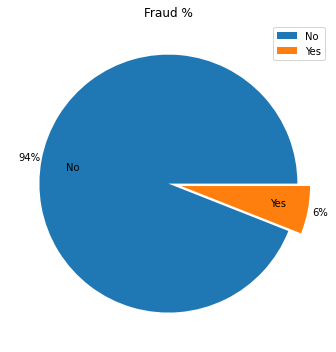

In [97]:
plt.figure(figsize=(12,5))
plt.pie(x=df['FraudFound'].value_counts(),autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.7,explode=[0,0.1],labels=['No','Yes'])
plt.title('Fraud %')
plt.legend()
plt.tight_layout()
plt.show()

In [98]:
y=df['FraudFound']
x=df.drop('FraudFound',axis=1)

In [99]:
x.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,1,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,1,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,11,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,7,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,2,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [74]:
oversample = SMOTE(sampling_strategy=0.1274)
x1, y1 = oversample.fit_resample(x, y)
y1.describe()

count    16343.000000
mean         0.112954
std          0.316546
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FraudFound, dtype: float64

In [75]:
result=pd.concat([x1,y1],axis=1)

In [76]:
result.shape

(16343, 33)

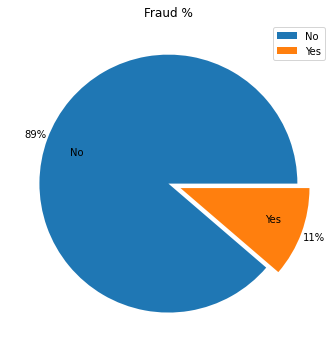

In [77]:
plt.figure(figsize=(12,5))
plt.pie(x=result['FraudFound'].value_counts(),autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.7,explode=[0,0.1],labels=['No','Yes'])
plt.title('Fraud %')
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
16338    1
16339    1
16340    1
16341    1
16342    1
Name: FraudFound, Length: 16343, dtype: int32

In [61]:
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,1,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,1,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,11,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,7,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,2,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16338,1,4,1,9,1,1,10.412,1,1,1,...,6,2,0,0,0,3,3,0,1996,1
16339,3,1,1,9,1,2,2,1,1,1,...,5,4,0,0,0,1,3,1,1995,0
16340,4,2,1,2,1,7,1,2,1,1,...,5,4,0,0,0,3,3,0,1994,0
16341,6,4,3,16,1,4,4,3,1,1,...,6,6,0,0,0,3,3,0,1994,0


In [62]:
Y

0         No
1         No
2         No
3         No
4         No
        ... 
16338    Yes
16339    Yes
16340    Yes
16341    Yes
16342    Yes
Name: FraudFound, Length: 16343, dtype: object

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x1)
print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14497
           1       0.99      0.81      0.89      1846

    accuracy                           0.98     16343
   macro avg       0.98      0.91      0.94     16343
weighted avg       0.98      0.98      0.98     16343



In [42]:
confusion_matrix(y1,y_pred)

array([[14479,    18],
       [  340,  1506]], dtype=int64)

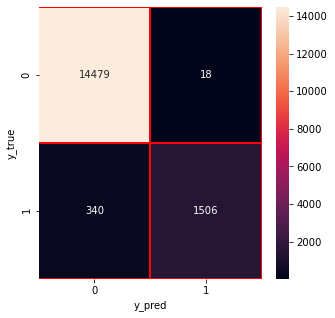

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [106]:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred=clf.predict(x1)
print(classification_report(y1, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

          No       0.89      0.89      0.89     14497
         Yes       0.11      0.11      0.11      1846

    accuracy                           0.80     16343
   macro avg       0.50      0.50      0.50     16343
weighted avg       0.80      0.80      0.80     16343



In [107]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x1)
print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

          No       0.94      0.94      0.94     14497
         Yes       0.52      0.52      0.52      1846

    accuracy                           0.89     16343
   macro avg       0.73      0.73      0.73     16343
weighted avg       0.89      0.89      0.89     16343



In [120]:
clf = MLPClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x1)
print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

          No       0.89      0.79      0.84     14497
         Yes       0.14      0.27      0.18      1846

    accuracy                           0.73     16343
   macro avg       0.52      0.53      0.51     16343
weighted avg       0.81      0.73      0.76     16343

